In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import folium.plugins
import plotly
import ipywidgets as widgets
from IPython.display import display
#import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
stations = pd.read_csv('Sheriff_and_Police_Stations.csv')

In [3]:
stations_filtered = stations[['X', 'Y', 'cat2', 'city']]#, 'zip', 'POINT_X', 'POINT_Y']]

In [ ]:
stations_filtered = stations_filtered[stations_filtered['cat2'] == 'Sheriff and Police Stations']

In [4]:
stations_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       117 non-null    float64
 1   Y       117 non-null    float64
 2   cat2    117 non-null    object 
 3   city    117 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


## Estaciones

In [5]:
m = folium.Map(location=[stations_filtered['Y'].mean(), stations_filtered['X'].mean()], zoom_start=12)

In [6]:
for idx, row in stations_filtered.iterrows():
    folium.Marker([row['Y'], row['X']]).add_to(m)

In [7]:
m

## Crímenes

In [60]:
crime_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [61]:
#convert crime_df['DATE OCC'] to datetime
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['DATE OCC']

C:\Users\hp\AppData\Local\Temp\ipykernel_15224\2798668889.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])


0        2020-03-01
1        2020-02-08
2        2020-11-04
3        2020-03-10
4        2020-08-17
            ...    
951603   2024-01-13
951604   2024-02-17
951605   2024-01-16
951606   2024-01-15
951607   2024-04-24
Name: DATE OCC, Length: 951608, dtype: datetime64[ns]

In [62]:
#crime_df_2020 = crime_df[crime_df['DATE OCC'].dt.year == 2020]
crime_df_2020 = crime_df[crime_df['Crm Cd Desc'] == 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)']
#crime_df_2020 = crime_df_2020[crime_df_2020['Premis Desc'] == 'ALLEY']

In [63]:
m2 = folium.Map(location=[crime_df_2020['LAT'].mean(), crime_df_2020['LON'].mean()], zoom_start=12)

In [64]:
'''for idx, row in crime_df.iterrows():
    folium.Marker([row['LAT'], row['LON']]).add_to(m2)'''
# Prepare the data for the heatmap
heat_data = crime_df_2020[['LAT', 'LON']].values.tolist()

# Add the heatmap layer
folium.plugins.HeatMap(heat_data).add_to(m2)

In [65]:
m2

In [14]:
stations_filtered.head(20)

,X,Y,cat2,city
0,-118.185705,33.844639,Sheriff and Police Stations,Long Beach
1,-118.126663,33.941363,Sheriff and Police Stations,Downey
2,-118.307637,33.883727,Sheriff and Police Stations,Gardena
3,-118.091208,33.946408,Sheriff and Police Stations,Santa Fe Springs
4,-117.969381,34.065952,Sheriff and Police Stations,Baldwin Park
5,-118.387567,33.838363,Sheriff and Police Stations,Redondo Beach
6,-118.354325,33.961476,Sheriff and Police Stations,Inglewood
7,-118.167967,34.044750,Sheriff and Police Stations,Monterey Park
8,-117.865451,34.135058,Sheriff and Police Stations,Glendora
9,-118.168644,34.182016,Sheriff and Police Stations,Altadena


In [15]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           951608 non-null  int64         
 1   Date Rptd       951608 non-null  object        
 2   DATE OCC        951608 non-null  datetime64[ns]
 3   TIME OCC        951608 non-null  int64         
 4   AREA            951608 non-null  int64         
 5   AREA NAME       951608 non-null  object        
 6   Rpt Dist No     951608 non-null  int64         
 7   Part 1-2        951608 non-null  int64         
 8   Crm Cd          951608 non-null  int64         
 9   Crm Cd Desc     951608 non-null  object        
 10  Mocodes         816159 non-null  object        
 11  Vict Age        951608 non-null  int64         
 12  Vict Sex        822716 non-null  object        
 13  Vict Descent    822706 non-null  object        
 14  Premis Cd       951597 non-null  flo

In [16]:
crime_df['Crm Cd Desc'].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                           103745
BATTERY - SIMPLE ASSAULT                                    74570
BURGLARY FROM VEHICLE                                       58877
THEFT OF IDENTITY                                           58800
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     57671
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
TRAIN WRECKING                                                  1
Name: count, Length: 139, dtype: int64

In [17]:
crime_df['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174018
UNKNOWN WEAPON/OTHER WEAPON                        35419
VERBAL THREAT                                      23751
HAND GUN                                           19995
SEMI-AUTOMATIC PISTOL                               7218
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [18]:
crime_df['Premis Desc'].value_counts()

Premis Desc
STREET                                          242966
SINGLE FAMILY DWELLING                          159521
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    115275
PARKING LOT                                      65603
OTHER BUSINESS                                   45306
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
HORSE RACING/SANTA ANITA PARK*                       2
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
DEPT OF DEFENSE FACILITY                             2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
Name: count, Length: 306, dtype: int64

In [19]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951608 entries, 0 to 951607
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           951608 non-null  int64         
 1   Date Rptd       951608 non-null  object        
 2   DATE OCC        951608 non-null  datetime64[ns]
 3   TIME OCC        951608 non-null  int64         
 4   AREA            951608 non-null  int64         
 5   AREA NAME       951608 non-null  object        
 6   Rpt Dist No     951608 non-null  int64         
 7   Part 1-2        951608 non-null  int64         
 8   Crm Cd          951608 non-null  int64         
 9   Crm Cd Desc     951608 non-null  object        
 10  Mocodes         816159 non-null  object        
 11  Vict Age        951608 non-null  int64         
 12  Vict Sex        822716 non-null  object        
 13  Vict Descent    822706 non-null  object        
 14  Premis Cd       951597 non-null  flo

In [20]:
#DATE OCC,TIME OCC,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LAT,LON

In [21]:

#get rid of 2024 data
crime_df = crime_df[crime_df['DATE OCC'].dt.year < 2024]

In [22]:
#time series
crime_df_date = crime_df.groupby(['DATE OCC', 'Crm Cd Desc']).size()


In [23]:
crime_df_date.columns = ['DATE OCC','CRIME DESC', 'CRIMES PER DAY']

In [24]:
crime_df_date

DATE OCC    Crm Cd Desc                                             
2020-01-01  ARSON                                                        4
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47
            ATTEMPTED ROBBERY                                            5
            BATTERY - SIMPLE ASSAULT                                    74
            BATTERY ON A FIREFIGHTER                                     1
                                                                        ..
2023-12-31  VEHICLE - ATTEMPT STOLEN                                     2
            VEHICLE - STOLEN                                            54
            VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     3
            VIOLATION OF COURT ORDER                                     7
            VIOLATION OF RESTRAINING ORDER                              10
Length: 80316, dtype: int64

Dropdown(description='Choose:', options=('VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', …

Selected option: BURGLARY FROM VEHICLE


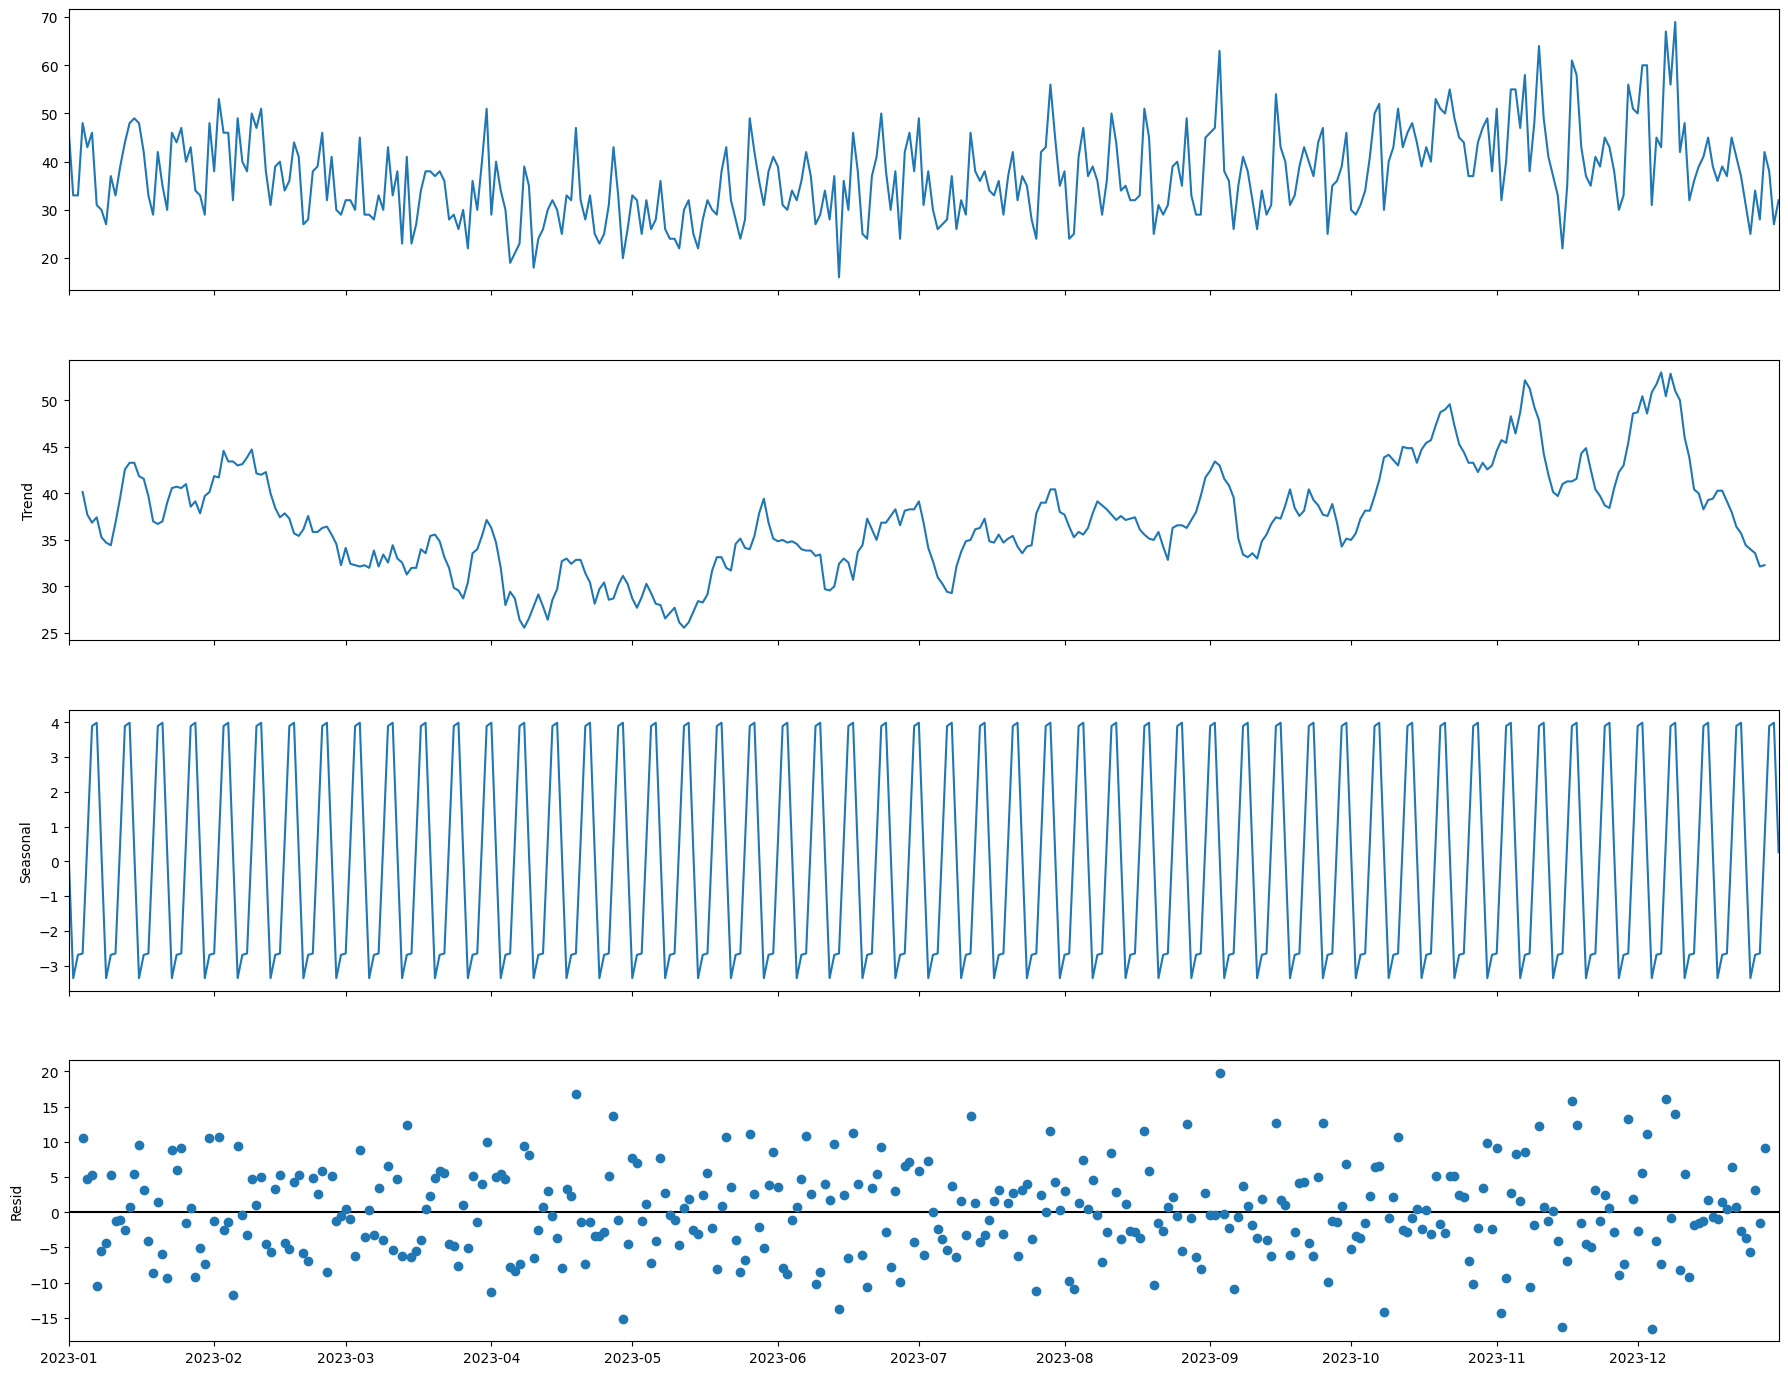

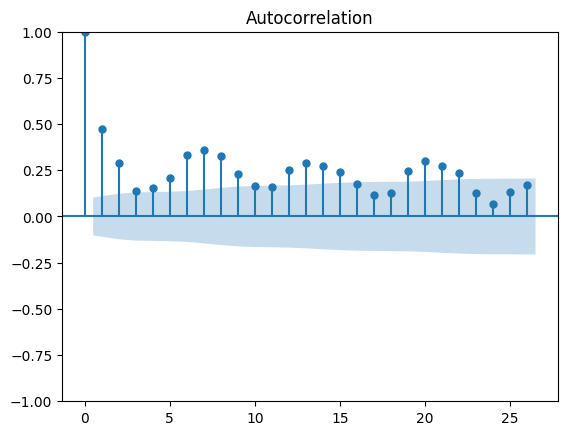

Selected option: VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)


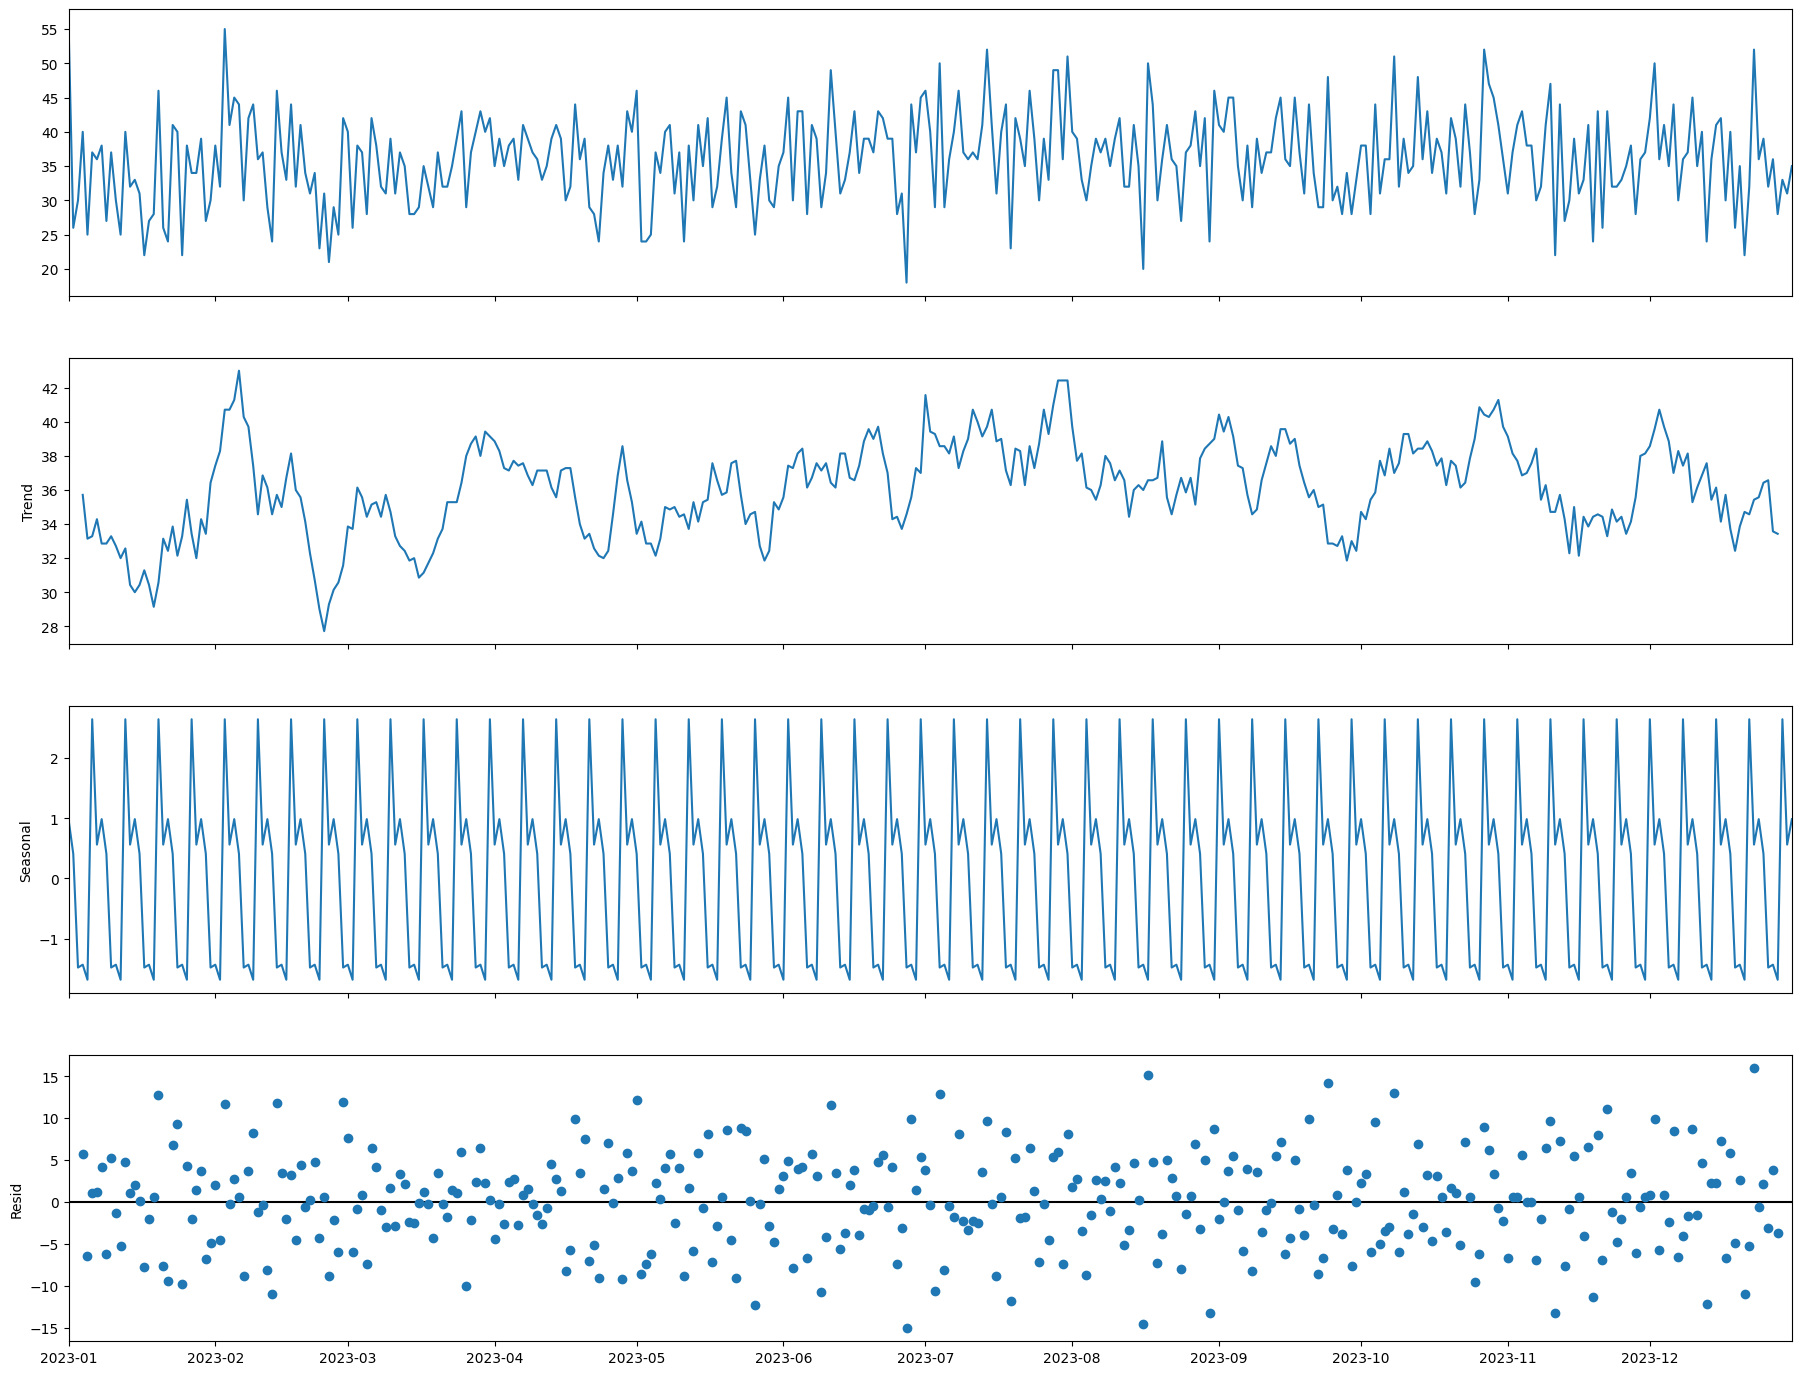

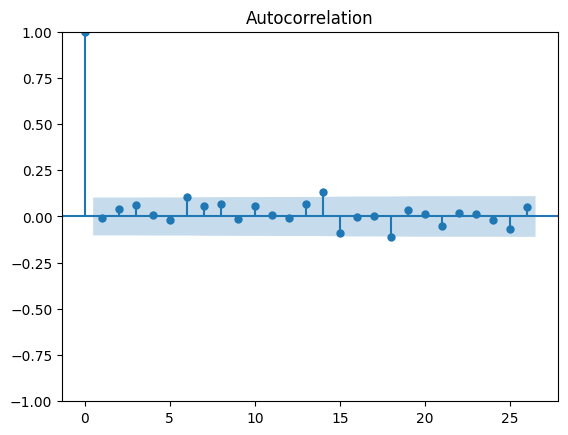

In [25]:
# Create a dropdown widget
temp = crime_df['Crm Cd Desc'].value_counts()
top_10_crime_desc = crime_df['Crm Cd Desc'].value_counts().head(10).index.tolist()

dropdown = widgets.Dropdown(
    options=top_10_crime_desc,
    value=top_10_crime_desc[0],
    description='Choose:',
)

# Display the dropdown widget
display(dropdown)

# Function to handle dropdown value change
def on_value_change(change):
    print(f'Selected option: {change["new"]}')
    #plot time series
    #plot size
    crime_df_date = crime_df[crime_df['Crm Cd Desc'] == change['new']].groupby(['DATE OCC']).size()
    #get only 2023 data
    crime_df_date = crime_df_date[crime_df_date.index.year == 2023]
    #crime_df_date.plot()

    #plot decomposition of time series
    decomposition = seasonal_decompose(crime_df_date, model='additive', period=7)
    fig = decomposition.plot()
    #fig size
    fig.set_size_inches(20, 15)
    plt.show()
    #plot acf
    plot_acf(crime_df_date)

# Attach the function to the dropdown widget
dropdown.observe(on_value_change, names='value')
